In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series
from pandas import DataFrame

In [43]:
df = pd.read_csv('GermanCredit.csv')
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [44]:
df.drop(columns=['other_parties','other_payment_plans','residence_since'], inplace=True)

In [45]:
df.replace('\'','', regex=True, inplace=True)

In [46]:
df['checking_status'].replace({'no checking':'No Checking','<0':'Low','0<=X<200':'Medium','>=200':'High'},inplace=True)

In [47]:
df['savings_status'].replace({'no known savings':'No Savings','<100':'Low','100<=X<500':'Medium','500<=X<1000':'High','>=1000':'High'},inplace=True)

In [48]:
df['employment'].replace({'unemployed':'Unemployed','<1':'Amateur','1<=X<4':'Professional','4<=X<7':'Experienced','>=7':'High'},inplace=True)

In [49]:
df['class'].replace({'good':1,'bad':0},inplace=True)

In [50]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,High,4,male single,real estate,67,own,2,skilled,1,yes,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,real estate,22,own,1,skilled,1,none,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,real estate,49,own,1,unskilled resident,2,none,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,life insurance,45,for free,1,skilled,2,none,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,no known property,53,for free,2,skilled,2,none,yes,0


In [51]:
df.groupby('foreign_worker')['class'].value_counts()

foreign_worker  class
no              1         33
                0          4
yes             1        667
                0        296
Name: class, dtype: int64

In [52]:
df.groupby('employment')['savings_status'].value_counts()

employment    savings_status
Amateur       Low               120
              No Savings         23
              Medium             17
              High               12
Experienced   Low               100
              No Savings         32
              Medium             24
              High               18
High          Low               133
              No Savings         64
              High               34
              Medium             22
Professional  Low               210
              No Savings         52
              High               44
              Medium             33
Unemployed    Low                40
              No Savings         12
              Medium              7
              High                3
Name: savings_status, dtype: int64

In [53]:
emp = df.loc[df['employment']=='Experienced']

male = emp.loc[emp['personal_status']=='male single']

male['credit_amount'].mean()

4142.592592592592

In [54]:
df.groupby('job')['duration'].mean()

job
high qualif/self emp/mgmt    25.168919
skilled                      21.411111
unemp/unskilled non res      17.363636
unskilled resident           16.535000
Name: duration, dtype: float64

In [55]:
edu = df.loc[df['purpose']=='education']

status = edu['checking_status'].value_counts().head(1)
print('The most common checking status: ',status)

savings = edu['savings_status'].value_counts().head(1)
print('The most common savings status: ',savings)

The most common checking status:  No Checking    20
Name: checking_status, dtype: int64
The most common savings status:  Low    30
Name: savings_status, dtype: int64


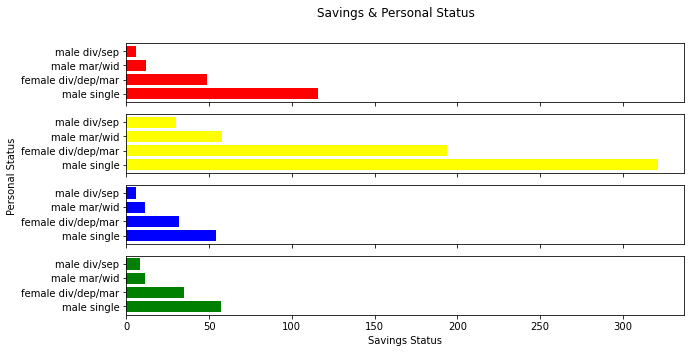

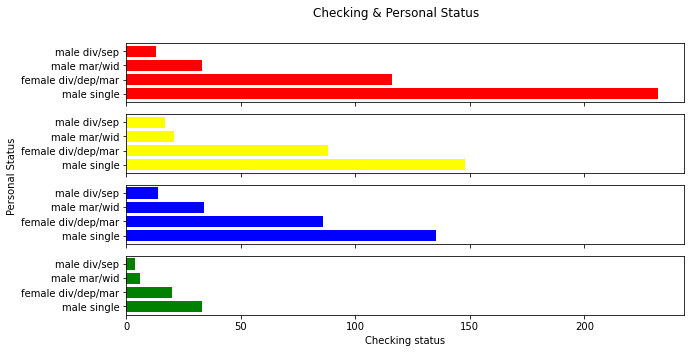

In [56]:
fig, axes = plt.subplots(4, figsize=(10, 5), sharex=True, sharey = True)

fig.suptitle('Savings & Personal Status', fontsize = 12)
df1 = df.groupby('savings_status')['personal_status'].value_counts()
arr = ['male single', 'female div/dep/mar', 'male mar/wid', 'male div/sep']
nosav = df1['No Savings']
losav = df1['Low']
midsav = df1['Medium']
hisav = df1['High']
plt.xlabel('Savings Status', ha ='center')
axes[2].set_ylabel('Personal Status', ha ='left')
axes[0].barh(arr, nosav, color = 'red')
axes[1].barh(arr, losav, color = 'yellow')
axes[2].barh(arr, midsav, color = 'blue')
axes[3].barh(arr, hisav, color = 'green')
plt.xticks(rotation=0)

fig, axes = plt.subplots(4, figsize=(10, 5), sharex=True, sharey = True)

fig.suptitle('Checking & Personal Status', fontsize = 12)
df2 = df.groupby('checking_status')['personal_status'].value_counts()
arr = ['male single', 'female div/dep/mar', 'male mar/wid', 'male div/sep']
noche = df2['No Checking']
loche = df2['Low']
midche = df2['Medium']
hiche = df2['High']
plt.xlabel('Checking status', ha ='center')
axes[2].set_ylabel('Personal Status', ha ='left')
axes[0].barh(arr, noche, color = 'red')
axes[1].barh(arr, loche, color = 'yellow')
axes[2].barh(arr, midche, color = 'blue')
axes[3].barh(arr, hiche, color = 'green')
plt.xticks(rotation=0)

plt.show()

Text(0, 0.5, 'Average customer age')

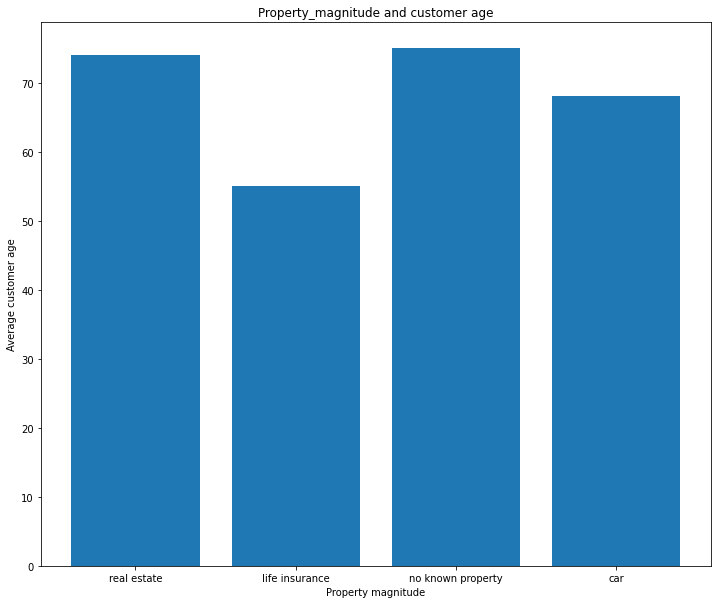

In [57]:
credit = df[df['credit_amount']>4000]
plt.figure(figsize=(12,10))
plt.bar(credit['property_magnitude'],credit['age'])
plt.title('Property_magnitude and customer age')
plt.xlabel('Property magnitude')
plt.ylabel('Average customer age')

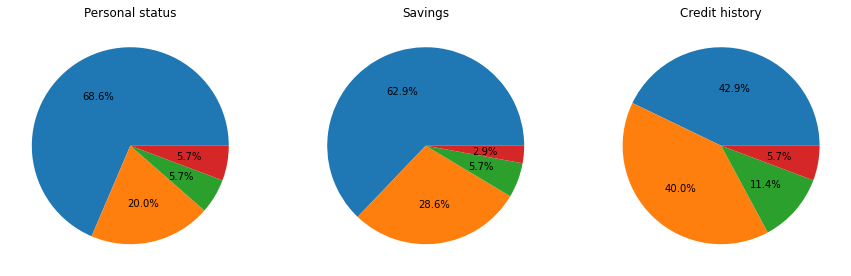

In [58]:
age = df[df['age']>40]
savings = age[age['savings_status']=='High']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].pie(savings['personal_status'].value_counts(), autopct = '%.1f%%')
axes[0].set_title('Personal status', fontsize = 12)

axes[1].pie(savings['job'].value_counts(), autopct = '%.1f%%')
axes[1].set_title('Savings', fontsize = 12)

axes[2].pie(savings['credit_history'].value_counts(), autopct = '%.1f%%')
axes[2].set_title('Credit history', fontsize = 12)

plt.show()